<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [39]:
!wget -O survey-data.sqlite "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-data.sqlite"

--2025-08-01 05:23:53--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
404 Not Foundsent, awaiting response... 
2025-08-01 05:23:53 ERROR 404: Not Found.



#### Install the required libraries and import them


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [28]:

import sqlite3
conn = sqlite3.connect("survey_data.sqlite")
import pandas as pd

#### Connect to the SQLite database


In [17]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [18]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)



   COUNT(*)
0     65437


**Demo 2: List all tables**


In [37]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('survey-data.sqlite')

# List tables
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(" Available Tables:")
print(tables)


 Available Tables:
   name
0  main


**Demo 3: Group data by age**


In [ ]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


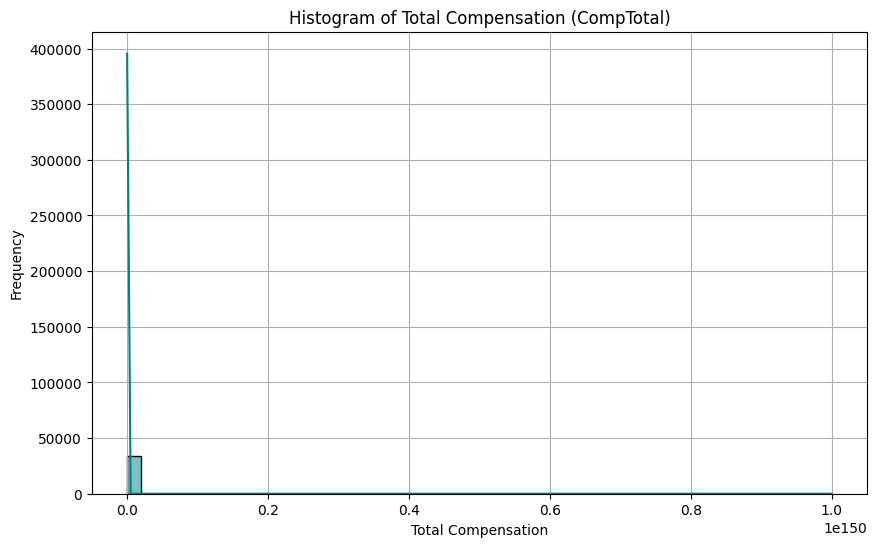

In [41]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the CSV
df = pd.read_csv('survey-data.csv')

# 2. Convert CompTotal to numeric
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# 3. Filter only valid compensation entries
df_comp = df[df['CompTotal'].notnull() & (df['CompTotal'] > 0)]

# 4. Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_comp['CompTotal'], bins=50, kde=True, color='teal')
plt.title('Histogram of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


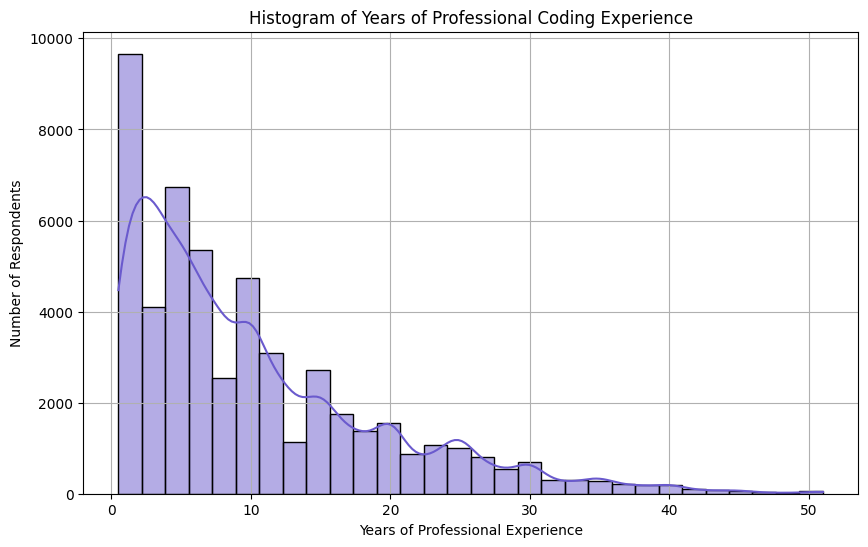

In [42]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the CSV (make sure it's in your working directory)
df = pd.read_csv('survey-data.csv')

# 2. Handle special values in 'YearsCodePro'
# Some values might be strings like "Less than 1 year", "More than 50 years"
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': '0.5',
    'More than 50 years': '51'
})

# 3. Convert to numeric
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# 4. Drop NaN values
df_clean = df[df['YearsCodePro'].notnull()]

# 5. Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['YearsCodePro'], bins=30, kde=True, color='slateblue')
plt.title('Histogram of Years of Professional Coding Experience')
plt.xlabel('Years of Professional Experience')
plt.ylabel('Number of Respondents')
plt.grid(True)
plt.show()


### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


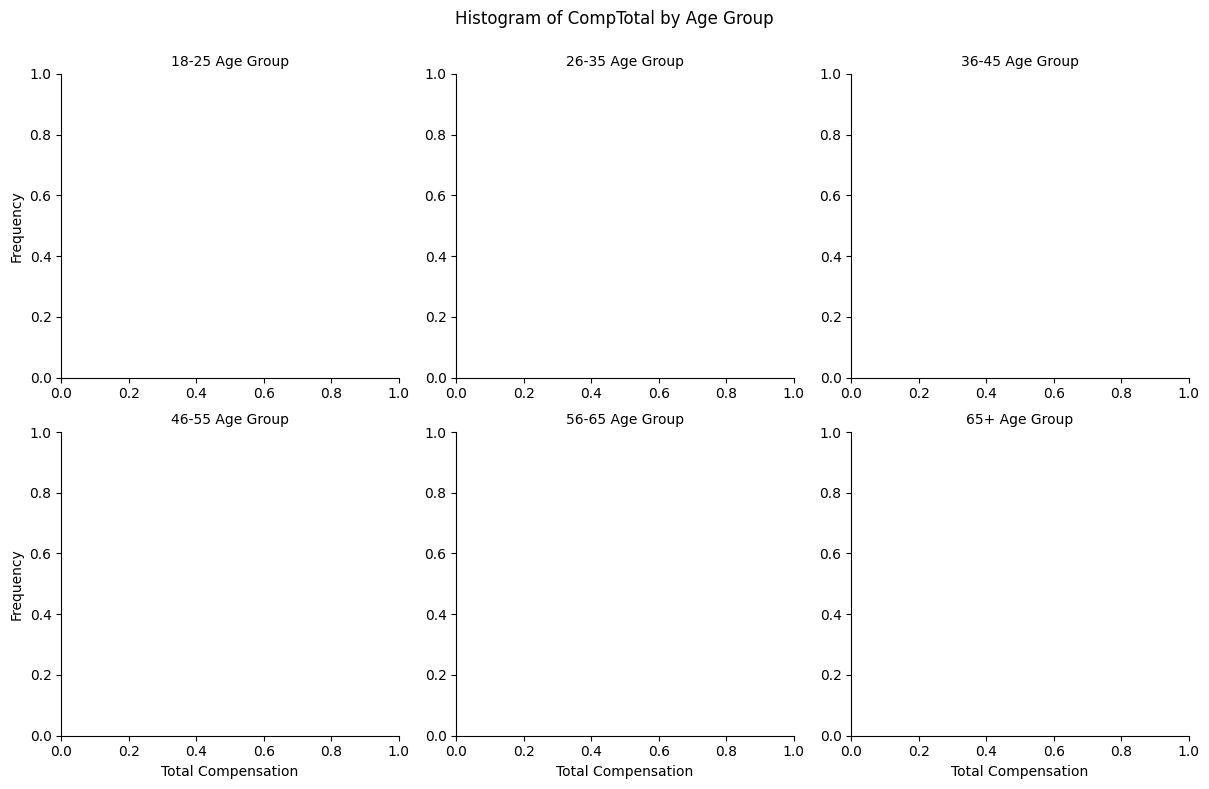

In [43]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the data
df = pd.read_csv('survey-data.csv')

# 2. Clean and convert necessary columns
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# 3. Filter valid data
df = df[df['CompTotal'].notnull() & (df['CompTotal'] > 0)]
df = df[df['Age'].notnull() & (df['Age'] > 0)]

# 4. Create age groups
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# 5. Plot histograms by AgeGroup
g = sns.FacetGrid(df, col="AgeGroup", col_wrap=3, height=4, sharex=False, sharey=False)
g.map_dataframe(sns.histplot, x="CompTotal", bins=40, color='mediumseagreen')
g.set_titles(col_template="{col_name} Age Group")
g.set_axis_labels("Total Compensation", "Frequency")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Histogram of CompTotal by Age Group")
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


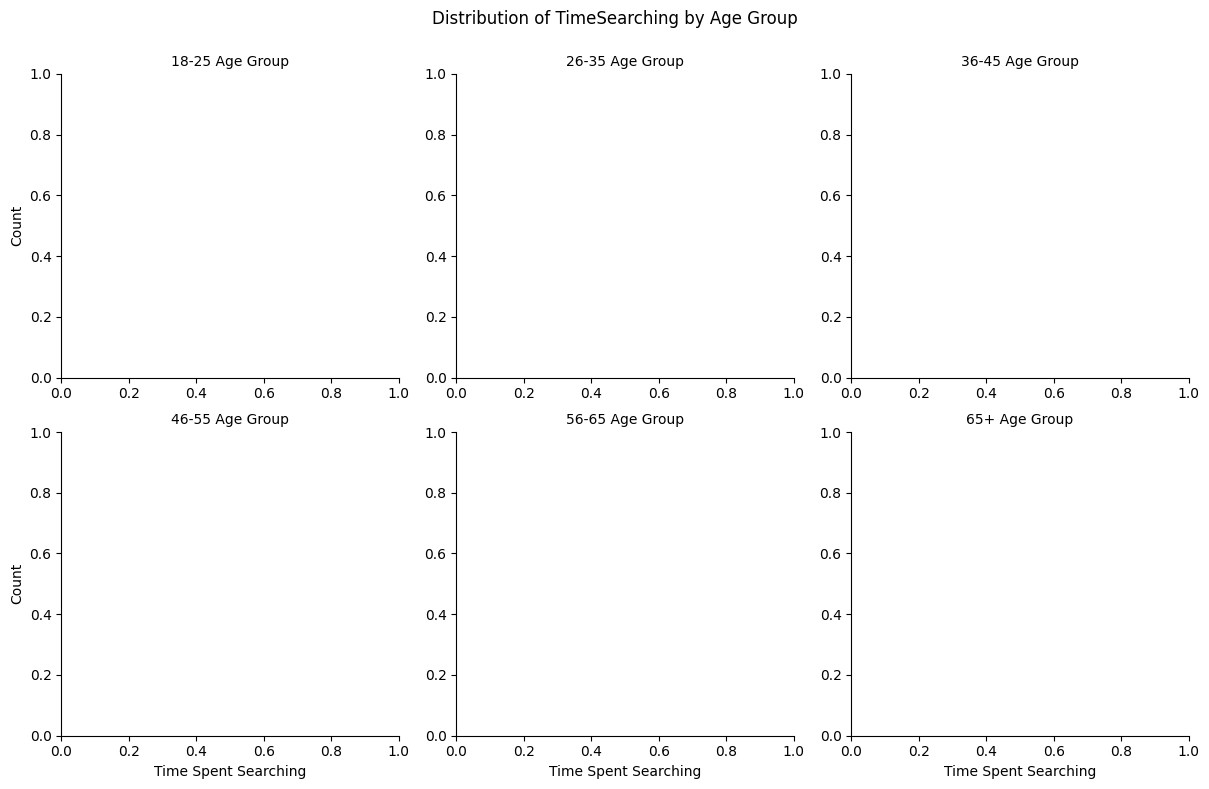

In [44]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset
df = pd.read_csv('survey-data.csv')

# 2. Clean and convert columns
df['TimeSearching'] = pd.to_numeric(df['TimeSearching'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# 3. Filter valid data
df = df[df['TimeSearching'].notnull() & (df['TimeSearching'] > 0)]
df = df[df['Age'].notnull() & (df['Age'] > 0)]

# 4. Create age groups
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# 5. Plot histograms for each age group
g = sns.FacetGrid(df, col="AgeGroup", col_wrap=3, height=4, sharex=False, sharey=False)
g.map_dataframe(sns.histplot, x="TimeSearching", bins=30, color='steelblue')
g.set_titles(col_template="{col_name} Age Group")
g.set_axis_labels("Time Spent Searching", "Count")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Distribution of TimeSearching by Age Group")
plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


/tmp/ipykernel_942/4229428796.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_dbs.values, y=top_dbs.index, palette='crest')


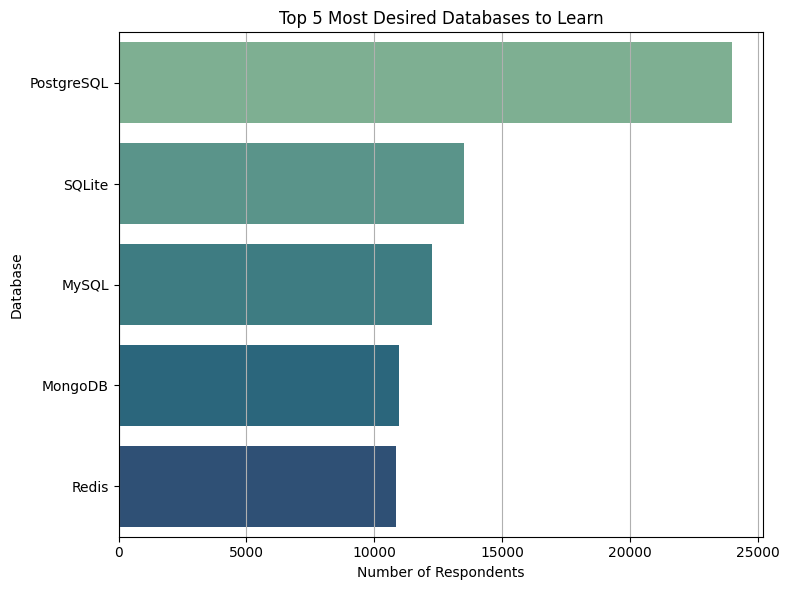

In [45]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load data
df = pd.read_csv('survey-data.csv')

# 2. Drop missing values in the relevant column
df = df[df['DatabaseWantToWorkWith'].notnull()]

# 3. Split comma-separated strings into individual database entries
db_series = df['DatabaseWantToWorkWith'].str.split(';').explode().str.strip()

# 4. Get top 5 most common databases
top_dbs = db_series.value_counts().nlargest(5)

# 5. Plot histogram (bar chart)
plt.figure(figsize=(8, 6))
sns.barplot(x=top_dbs.values, y=top_dbs.index, palette='crest')
plt.title('Top 5 Most Desired Databases to Learn')
plt.xlabel('Number of Respondents')
plt.ylabel('Database')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


/tmp/ipykernel_942/234534203.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=remote_counts.index, y=remote_counts.values, palette='Set2')


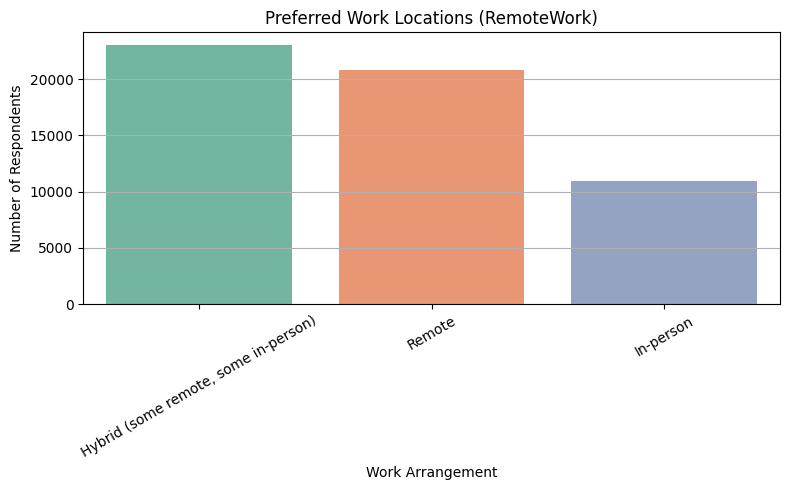

In [46]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load data
df = pd.read_csv('survey-data.csv')

# 2. Drop missing values
df = df[df['RemoteWork'].notnull()]

# 3. Count value occurrences
remote_counts = df['RemoteWork'].value_counts()

# 4. Plot histogram (bar chart)
plt.figure(figsize=(8, 5))
sns.barplot(x=remote_counts.index, y=remote_counts.values, palette='Set2')
plt.title('Preferred Work Locations (RemoteWork)')
plt.xlabel('Work Arrangement')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


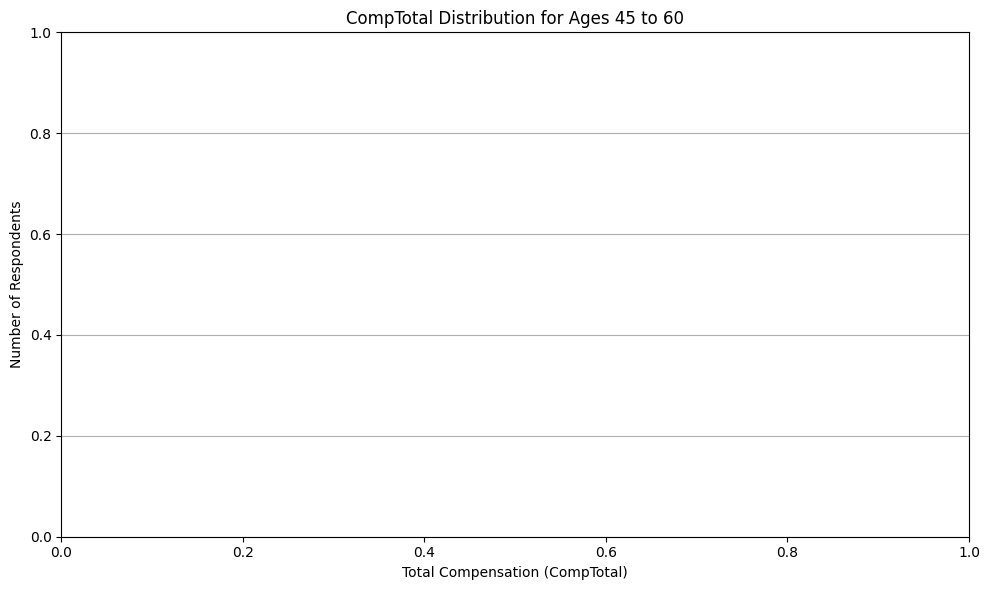

In [47]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load data
df = pd.read_csv('survey-data.csv')

# 2. Convert columns to numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# 3. Filter data for age 45 to 60 and valid compensation
df_filtered = df[(df['Age'] >= 45) & (df['Age'] <= 60) & (df['CompTotal'] > 0)]

# 4. Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['CompTotal'], bins=40, kde=True, color='teal')
plt.title('CompTotal Distribution for Ages 45 to 60')
plt.xlabel('Total Compensation (CompTotal)')
plt.ylabel('Number of Respondents')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


/tmp/ipykernel_942/691322565.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='YearsCodePro', y='JobSat', data=df, scale='width', inner='quartile', palette='coolwarm')
/tmp/ipykernel_942/691322565.py:32: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='YearsCodePro', y='JobSat', data=df, scale='width', inner='quartile', palette='coolwarm')


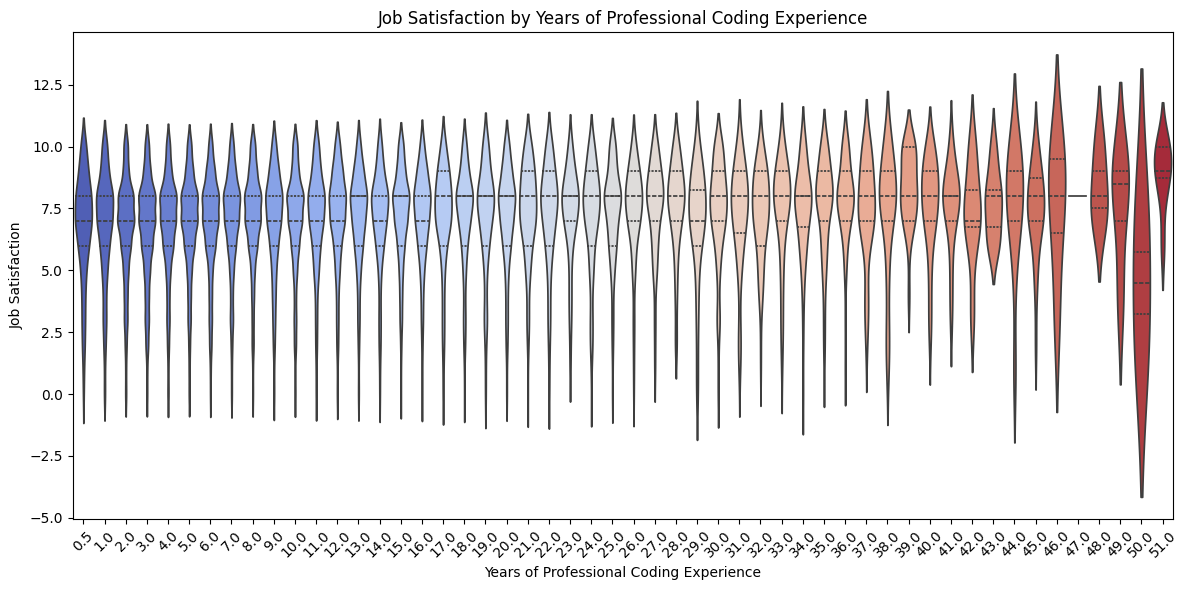

In [49]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load data
df = pd.read_csv('survey-data.csv')

# 2. Drop missing values for relevant columns
df = df[['YearsCodePro', 'JobSat']].dropna()

# 3. Convert 'YearsCodePro' to numeric (handle "Less than 1 year", "More than 50 years")
def clean_years(x):
    if x == 'Less than 1 year':
        return 0.5
    elif x == 'More than 50 years':
        return 51
    else:
        try:
            return float(x)
        except:
            return None

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_years)

# 4. Filter valid numeric values
df = df.dropna()


# 5. Plot: Boxen plot or violin plot to show distribution by experience
plt.figure(figsize=(12, 6))
sns.violinplot(x='YearsCodePro', y='JobSat', data=df, scale='width', inner='quartile', palette='coolwarm')
plt.title('Job Satisfaction by Years of Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [ ]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
